## Detection of breast cancer with Artificial Neural Networks

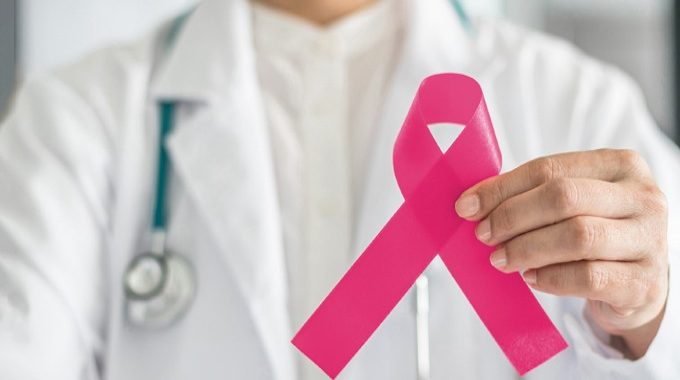

###### Dataset information:

- Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image, and can also be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

The dataset can be found on the `` Kaggle`` platform at the link below:

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

## 1. Imports from libraries

In [ ]:
import pandas as pd
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.models import model_from_json

## 2. Starting...

In [ ]:
df = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv", header = 0)
df.head()

In [ ]:
df.head(3)

We have 30 columns present in the given dataset, 30 of which are characteristic variables (input data) the target variable (which we want our model to be able to predict).

In [ ]:
df.info()

You can see that all variables are of type ``float64`` ("decimal" numbers).

Since all values in our dataset are numeric, we don't need to transform from "object" type to numeric type.

In [ ]:
df.describe()

The ``describe()`` function generates a lot of information about numeric variables that can also be useful

Deleting the `id` and ``Unnamed: 32`` column:

In [ ]:
df.drop(columns = ['id', 'Unnamed: 32'], inplace = True)

#### Finding Missing Data (NaN)
Our dataset does not have missing values as it says on the UCI website, but just in case:

In [ ]:
df.isnull().sum()

As expected, we have no missing values :D

In [ ]:
df.columns

In [ ]:
X = df[df.columns[1:]]
y = df["diagnosis"]

## 3. Construction of the model (Artificial neural networks)

The purpose of the Neural Networks algorithm is to imitate the nervous system of humans in the learning process, it is inspired by biological neural networks.

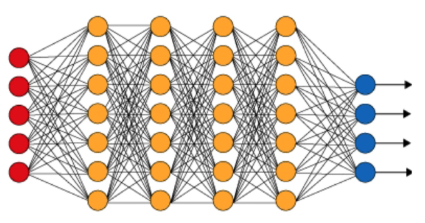

###### Artificial neural network parameters:
Link: https://keras.io/

Parameters of the `` RNA``:

     Sequential - Creation of a new neural network
     Dense - All connected neurons
     units - Number of neurons that are part of the hidden layer
     activation - Activation function that will be inserted
     input_dim - how many elements are there in the input layer
     Dropout - is used to decrease the chance of overfitting (20% of input neurons are zeroed)
    
``Compile`` parameters:

     optimizer - descent of the gradient and descent of the stochastic gradient
     loss - Loss function (binary_crossentropy as there is only one exit)
     metrics - Evaluation metrics (obs - more than one can be placed)

In [ ]:
def createModel():
    classifier = Sequential()
    # input layer
    classifier.add(Dense(units = 8, activation = 'relu', 
                        kernel_initializer = 'normal', input_dim = 30))
    classifier.add(Dropout(0.2))
    # hidden layer
    classifier.add(Dense(units = 8, activation = 'relu', 
                        kernel_initializer = 'normal'))
    classifier.add(Dropout(0.2))
    # output layer
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    # compile
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])
    return classifier

###### Network Creation Parameters

     build_fn - Neural network build function
     epochs - the number of times the weights will be adjusted
     batch_size - error calculation every 10 records

###### Cross Validation Parameters

     estimator - Neural network creation function
     X - Predictive attributes
     y - Output class
     cv - Number of test times (10 database divisions)
     scoring - return of results

In [ ]:
classifier = KerasClassifier(build_fn = createModel, epochs = 250, batch_size = 10)
results = cross_val_score(estimator = classifier,
                             X = X, y = y,
                             cv = 10, scoring = 'accuracy')

In [ ]:
# Probability of each test
print(f'Results: {results}\nMean: {results.mean()}\nStandard Deviation: {results.std()}')